In this notebook, I demonstrate the way we can get started with the data scraped so far. 

The data resides in .txt files. Each file contains data for 1000 tweets. The nature of tweets scraped is as below:
- These tweets explicitly mentioned the respective presidential candidate. No retweeting, no replying to a candidates' tweets etc. These tweets are important in the sense that they explicitly seek to engage a presidential candidate on Twitter. They are not necessarily reactions to/retweets of a presidential candidate's own tweets. Given these assumptions, I believe they are relatively more rich for information-topic discovery.
- Tweets that span multiple lines (have a \n character to be precise) were modified to have an explicit backslashN string instead of \n (to make storage simple). Please replace backslashN with \n explicitly when analyzing the tweets.
- The structure of each tweet data stored per-line is the following fields separated by a :::: delimiter: retweet_count, author_screen_name, author_followers_count, author_following_count, created_at, id_str, full_text


Let's pick one of the files containing Twitter data. I'll choose Bernie.txt as a reference.




In [3]:
with open('Bernie.txt', 'r') as fBernie:
    for line in fBernie:
        data = line.split('::::')
        for field in data:
            print(field)
        break
    

0
ghostriderr74
24
85
2019-11-24 00:35:01
1198399587649613824
@BernieSanders Not -- in my town we have medical clinic charging $85 dollars a month for a family of 4 and discounted med.  By law if something bad happens emergency rooms have to take them.



# Loading Data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


field_names = ['retweet_count', 'author_screen_name', 'author_followers_count', 'author_following_count', 'created_at', 'id_str', 'full_text']


def load_txt(name):
    with open('{}.txt'.format(name), 'r') as fHandle:
        file_data = [line.replace('backslashN', '\n').split('::::') for line in fHandle.readlines() if len(line.replace('backslashN', '\n').split('::::'))==len(field_names)]
    return file_data
    
    

In [63]:

data_bernie = load_txt('Bernie')
data_joe = load_txt('Joe')
data_liz= load_txt('Elizabeth')


df_bernie = pd.DataFrame(data=data_bernie, columns=field_names).drop_duplicates(subset = 'full_text').reindex()
df_joe = pd.DataFrame(data=data_joe, columns=field_names).drop_duplicates(subset = 'full_text').reindex()
df_liz = pd.DataFrame(data=data_liz, columns=field_names).drop_duplicates(subset = 'full_text').reindex()





In [64]:
display(df_bernie.head(), df_joe.head(), df_liz.head())

,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,853,cenkuygur,424365,1048,2019-11-29 05:36:55,1200287500419375105,Here’s another reason why @BernieSanders has a...
1,1875,SaraCarterDC,894344,4686,2019-11-29 18:45:00,1200485829111513088,These Dem Sens. r running against #Trump in #2...
2,604,BenSpielberg,13840,2342,2019-11-29 00:24:46,1200208948852187136,"Corporate Democrats are fond of saying ""I'm a ..."
3,0,Jeffharjo2,4,25,2019-11-29 22:14:42,1200538604755443713,@BernieSanders How can that be ? 🤔 that is th...
4,0,RomeoIsAKing,125,169,2019-11-29 22:14:36,1200538576544358400,@Indepen54356437 @Astropatontwitt @tacticsradi...


,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,2750,SebGorka,929605,4147,2019-11-28 19:56:14,1200141368619868161,"It’s Thanksgiving, @JoeBiden and @BarackObama ..."
1,1452,BernardKerik,49780,5818,2019-11-28 04:39:30,1199910665680543745,Such BullS**t! ⁦@RudyGiuliani⁩ was President ⁦...
2,596,TrumpWarRoom,404077,134,2019-11-29 16:20:28,1200449458741424130,"Wow, the fliers for @JoeBiden's upcoming Iowa ..."
3,0,sockmonkee2,958,1421,2019-11-29 22:30:04,1200542469407903744,"@Alyssa_Milano \n\nSo in your world, better th..."
4,0,SandyBarket,841,824,2019-11-29 22:30:00,1200542451976589312,"@JoeBiden @QuancyClayborne Joe, if this is rea..."


,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,2007,SaraCarterDC,894364,4686,2019-11-29 18:45:00,1200485829111513088,These Dem Sens. r running against #Trump in #2...
1,365,TeamWarren,48279,420,2019-11-28 18:37:37,1200121584142487552,".@ewarren’s granddaughter, Lavinia, gives grea..."
2,249,julianzelizer,28160,3454,2019-11-29 13:28:01,1200406059933949952,Democrats doing the “attack the leftist polici...
3,0,CatfishFishy,328,1340,2019-11-29 22:45:27,1200546342134697984,@SatchelMose @ewarren I can't understand her p...
4,0,HarrietBaldwin,20931,4124,2019-11-29 22:45:25,1200546331946889218,@ewarren “You didn’t build that” remix. I hat...


# Cool Statistics

## --- JUST FOR df_bernie ------

In [71]:
def get_tweet_stats(df):
    
    stats = dict()
    
    # tweet-related
    stats['total'] = df.shape[0]
    stats['num_unique_by_content'] = df['full_text'].str.lower().nunique()
    
    
    # user/tweet author-related
    stats['num_unique_authors'] = df['author_screen_name'].nunique()
    
    # date-related
    stats['total_days'] = pd.to_datetime(df['created_at']).dt.date.nunique()
    stats['start_date'] = str(pd.to_datetime(df['created_at']).dt.date.min())
    stats['end_date'] = str(pd.to_datetime(df['created_at']).dt.date.max())
    stats['tweets_by_date'] = pd.to_datetime(df['created_at']).dt.date.apply(lambda x:str(x)).value_counts(ascending = True).to_dict()
    

    
    
    return stats
    

In [72]:
get_tweet_stats(df_bernie)

{'total': 22345,
 'num_unique_by_content': 22335,
 'num_unique_authors': 11848,
 'total_days': 10,
 'start_date': '2019-11-21',
 'end_date': '2019-12-01',
 'tweets_by_date': {'2019-11-25': 2,
  '2019-11-24': 2,
  '2019-11-27': 3,
  '2019-11-26': 4,
  '2019-11-21': 12,
  '2019-11-22': 15,
  '2019-11-28': 2971,
  '2019-11-29': 3432,
  '2019-11-30': 7195,
  '2019-12-01': 8709}}

In [73]:
for groupid, group in df_bernie.groupby(pd.to_datetime(df_bernie['created_at']).dt.date):
    print(groupid)
    print(group["full_text"].head(5), )
    print('-------------------')

2019-11-21
15484    "Here's the secret. You got to sit on the suit...
15486    Today at @BernieSanders’ @Morehouse rally, @ni...
15487    @BernieSanders @TheUnderculture And here is th...
15490    Polls keep showing that voters see @BernieSand...
15493    .@msnbc's chief neoliberal taking issue with @...
Name: full_text, dtype: object
-------------------
2019-11-22
15483    I support @BernieSanders because he’s for Medi...
15485    “Electability” - are we all ready to admit tha...
15488    During a visit to Morehouse, @BernieSanders wa...
15489    To @BernieSanders and others who are buying th...
15491    Fox Nation's @TomiLahren has a warning for tho...
Name: full_text, dtype: object
-------------------
2019-11-24
15479    After his remarks at the labor solidarity dinn...
15480    As president, @BernieSanders will make prison ...
Name: full_text, dtype: object
-------------------
2019-11-25
27727    ⁦.⁦@johncusack⁩ Slams ⁦@MSNBC⁩ Over ⁦@BernieSa...
27729    .@BernieSanders says he wil

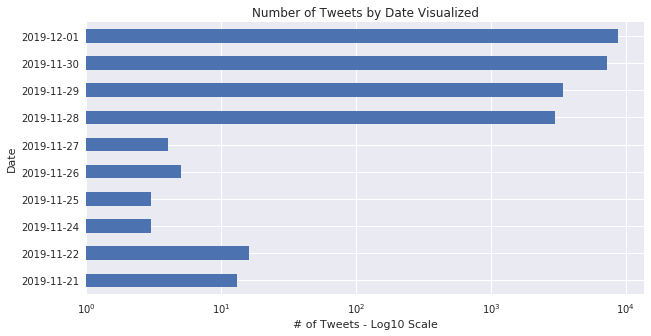

In [74]:
plt.figure(figsize = (10, 5))
df_bernie.groupby(pd.to_datetime(df_bernie['created_at']).dt.date)["full_text"].count().plot(kind='barh', log=True)
plt.xlabel('# of Tweets - Log10 Scale')
plt.ylabel('Date')
plt.title('Number of Tweets by Date Visualized')
plt.show()

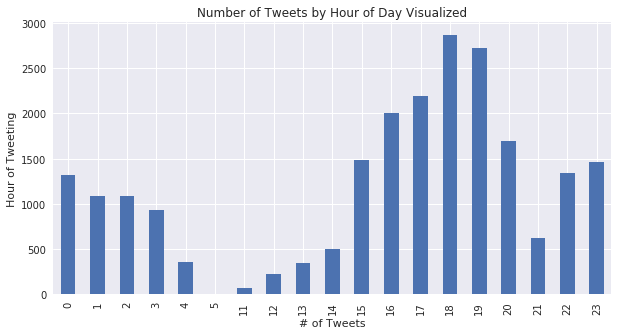

In [75]:
plt.figure(figsize = (10, 5))
df_bernie.groupby(pd.to_datetime(df_bernie['created_at']).dt.hour)["full_text"].count().plot(kind='bar')
plt.xlabel('# of Tweets')
plt.ylabel('Hour of Tweeting')
plt.title('Number of Tweets by Hour of Day Visualized')
plt.show()